In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

import seaborn as sns


In [2]:
np.arange(0,1,0.1),np.linspace(0,1,11)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [3]:

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R1 = np.sqrt(X**2 + Y**2)
Z1 = np.sin(R1)


In [4]:
Y

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.75, -4.75, -4.75, ..., -4.75, -4.75, -4.75],
       [-4.5 , -4.5 , -4.5 , ..., -4.5 , -4.5 , -4.5 ],
       ...,
       [ 4.25,  4.25,  4.25, ...,  4.25,  4.25,  4.25],
       [ 4.5 ,  4.5 ,  4.5 , ...,  4.5 ,  4.5 ,  4.5 ],
       [ 4.75,  4.75,  4.75, ...,  4.75,  4.75,  4.75]])

In [5]:
def freq_func_sine1(x,y,f,n):
    return np.cos(f*(x**2+y**2)*(1+n*np.random.uniform()))
def gen_heightmap(xlims,ylims,sr,o,p,l,f,n,freq_func):
    
    X = np.linspace(xlims[0],xlims[1], (xlims[1] - xlims[0])*sr)
    Y = np.linspace(ylims[0],ylims[1], (ylims[1] - ylims[0])*sr)
    
    X, Y = np.meshgrid(X, Y)
    
    op_layers = np.zeros([o,(xlims[1] - xlims[0])*sr,(ylims[1] - ylims[0])*sr])
    for i in range(o):
        op_layers[i,:,:] = (1 + n*np.random.uniform(*X.shape))*(p**i)*freq_func(X,Y,f*(l**i),n)
        
    op_array = op_layers.sum(axis=0)
    return X,Y,op_array

In [6]:
def plot_surface_1(xplot,yplot,X,Y,Z,cmap):
    fig = plt.figure(figsize=[xplot,yplot])
    ax = fig.gca(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,
                           linewidth=0, antialiased=True)

    # Customize the z axis.
    # ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
    
def plot_surface_sns(xplot,yplot,X,Y,Z,cmap):
    fig = plt.figure(figsize=[xplot,yplot])
    ax = fig.gca(projection='3d')

    # Plot the surface.
#     surf = ax.plot_surface(X, Y, Z, cmap=cmap,linewidth=0, antialiased=True)
    
    surf = ax.plot_trisurf(X,Y,Z, cmap=cmap, linewidth=0.2)


    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

In [7]:
# gen_heightmap(xlims,ylims,sr,o,p,l,f,freq_func)
X,Y,sample_hmap = gen_heightmap((-5,5),(-5,5),10,5,0.8,2,0.02,2,freq_func_sine1)

In [8]:
sample_hmap

array([[ 219.00222922,  200.90513261,  117.30602524, ...,  117.30602524,
         200.90513261,  219.00222922],
       [ 200.90513261,  114.97974435,   -8.99602848, ...,   -8.99602848,
         114.97974435,  200.90513261],
       [ 117.30602524,   -8.99602848, -118.21530659, ..., -118.21530659,
          -8.99602848,  117.30602524],
       ...,
       [ 117.30602524,   -8.99602848, -118.21530659, ..., -118.21530659,
          -8.99602848,  117.30602524],
       [ 200.90513261,  114.97974435,   -8.99602848, ...,   -8.99602848,
         114.97974435,  200.90513261],
       [ 219.00222922,  200.90513261,  117.30602524, ...,  117.30602524,
         200.90513261,  219.00222922]])

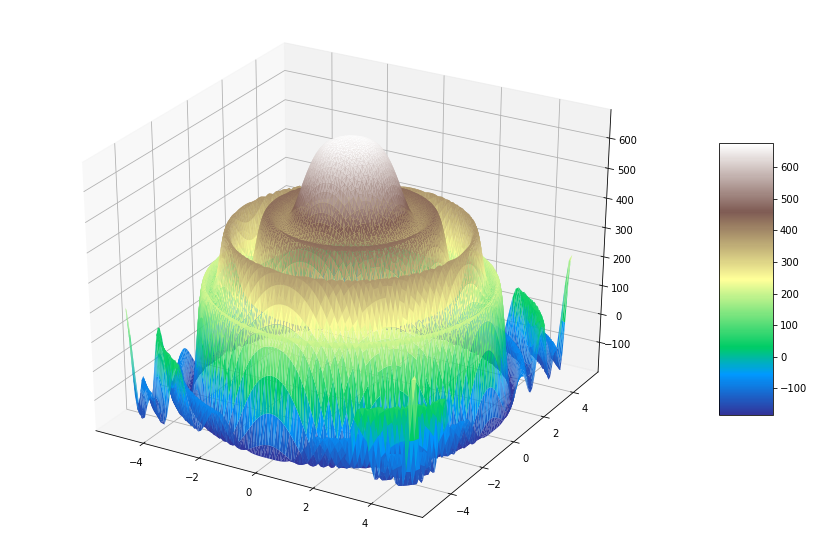

In [9]:
plot_surface_sns(15,10,X.flatten(),Y.flatten(),sample_hmap.flatten(),cm.terrain)

In [10]:
r = 5
x = np.linspace(-1*r,r,100)
y = np.sqrt(r**2 - x**2)

In [11]:
def gen_circle(r,n):
    theta = np.linspace(0, 2*np.pi, n)

    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    return x1,x2

In [36]:
def plot_figure(x1,x2,fig=None,ax=None):
    if fig:
        pass
    else:
        fig, ax = plt.subplots(1)

    ax.plot(x1, x2)
    ax.set_aspect(1)

    plt.xlim(1.5*x1.min(),1.5*x1.max())
    plt.ylim(1.5*x2.min(),1.5*x2.max())

    plt.grid(linestyle='--')

    return fig,ax

In [13]:
def dist_line(x1,x2,a1,a2,b,f,a):
    proj = a1*x1 + a2*x2 + b
    dist = a*np.sin(proj*f)
    x1_dist = x1-1*a2*dist/np.sqrt(a1**2+a2**2)
    x2_dist = x2+a1*dist/np.sqrt(a1**2+a2**2)
    return x1_dist,x2_dist



In [14]:
x1,x2 = gen_circle(1,1000)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x29c4f1a6c50>)

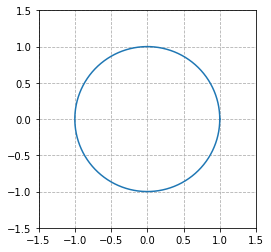

In [37]:
plot_figure(x1,x2)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x29c4d974940>)

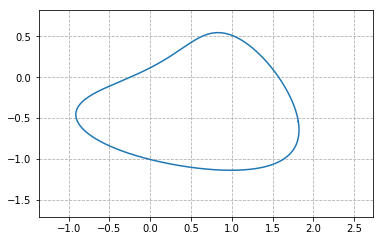

In [38]:
x1_1,x2_1 = dist_line(x1,x2,0.2,0.3,3,3.5,1)
plot_figure(x1_1,x2_1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x29c4d4dcac8>)

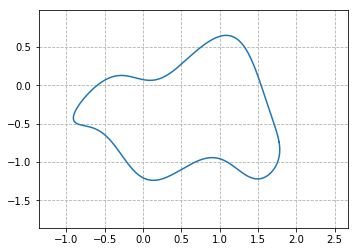

In [39]:
x1_2,x2_2 = dist_line(x1_1,x2_1,-0.5,0.1,-2,8,0.2)
plot_figure(x1_2,x2_2)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x29c4d6927f0>)

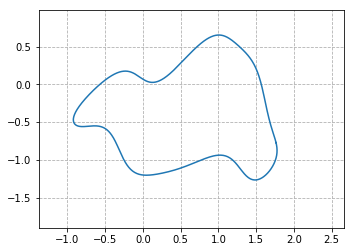

In [40]:
x1_3,x2_3 = dist_line(x1_2,x2_2,0.6,-0.2,5,12,0.05)
plot_figure(x1_3,x2_3)

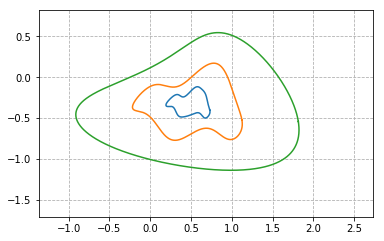

In [50]:
sc2 = 0.5
sc3 = 0.2
fig,ax = plot_figure(sc3*(x1_3-x1_3.mean())+x1_1.mean(),sc3*(x2_3-x2_3.mean())+x2_1.mean())
fig,ax = plot_figure(sc2*(x1_2-x1_2.mean())+x1_1.mean(),sc2*(x2_2-x2_2.mean())+x2_1.mean(),fig,ax)
fig,ax = plot_figure(x1_1,x2_1,fig,ax)



In [54]:
def shift_out(x1,x2,sc):
    sc_1 = sc*(np.abs(x1.mean()))
    sc_2 = sc*(np.abs(x2.mean()))
    
    x1_o = np.sign(x1)*np.random.uniform(0,sc_1,x1.shape[0]) + x1
    x2_o = np.sign(x2)*np.random.uniform(0,sc_2,x2.shape[0]) + x2
    
    return x1_o, x2_o
    

In [57]:
x1_o_1,x2_o_1 = shift_out(x1_3,x2_3,0.5)

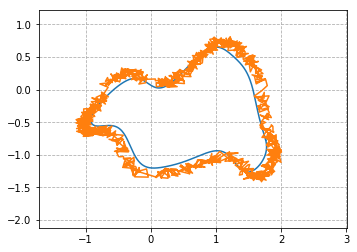

In [58]:
fig,ax = plot_figure(x1_3,x2_3)
fig,ax = plot_figure(x1_o_1,x2_o_1,fig,ax)

In [70]:
def dist_line_2(x1,x2,sc_max,sc_min,f,b):
    a = (sc_max-sc_min)/2
    theta = np.linspace(0,2*np.pi,x1.shape[0])
    sc_v = sc_min+a*(1+np.sin(f*theta+b))
    x1_dist = x1*sc_v
    x2_dist = x2*sc_v
    print(sc_v.max(),sc_v.min())
    return x1_dist,x2_dist



In [71]:
x1_o_1,x2_o_1 = dist_line_2(x1_3,x2_3,1.5,1.2,3,1.2)

1.4999967605150095 1.200000614350226


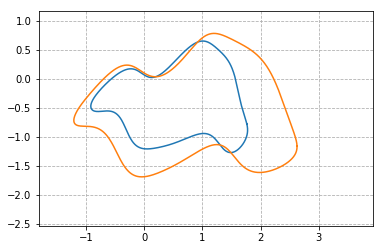

In [72]:
fig,ax = plot_figure(x1_3,x2_3)
fig,ax = plot_figure(x1_o_1,x2_o_1,fig,ax)